In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [21]:
df = pd.read_csv('../../philadelphia_restaurant_reviews.csv')
df_businesses = pd.read_json('../../yelp_academic_dataset_business.json', lines=True)
df_businesses = df_businesses[df_businesses['city'] == 'Philadelphia']


In [22]:
# Filter the businesses to only include restaurants
df_businesses = df_businesses[df_businesses['categories'].str.contains('Restaurants', na=False)]

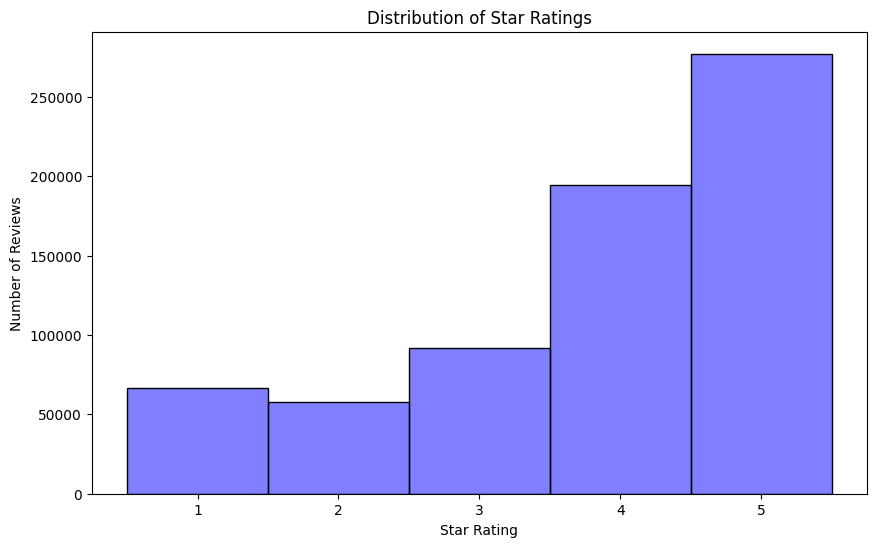

In [23]:
# Histogram of the number of reviews per star rating
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=5, color='blue', alpha=0.5, label='Star Rating', discrete=True)
plt.xticks([1, 2, 3, 4, 5])  # Ensure ticks are at the center of each bar
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Star Ratings')
plt.show()



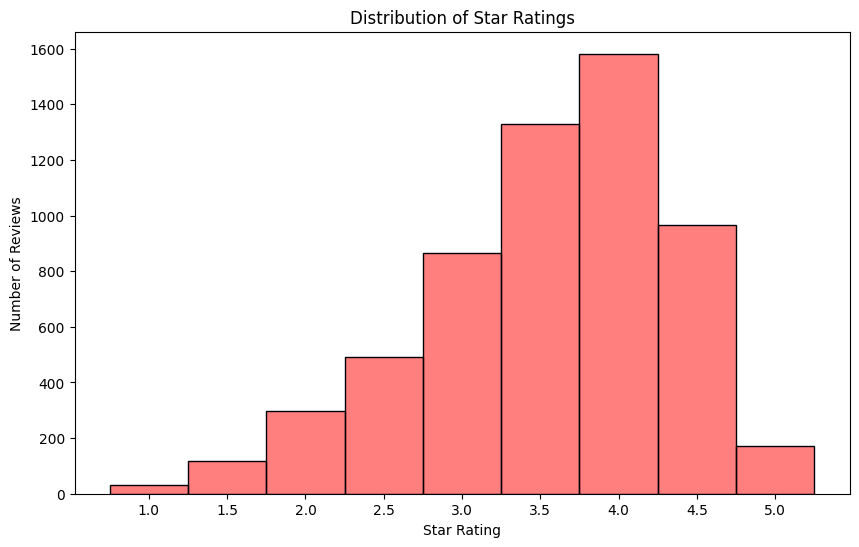

In [43]:
# Define bin edges centered around half-star steps (e.g., 1.0, 1.5, ..., 5.0)
bin_width = 0.5
min_star = df_businesses['stars'].min()
max_star = df_businesses['stars'].max()
bin_edges = np.arange(min_star - bin_width/2, max_star + bin_width, bin_width)

plt.figure(figsize=(10, 6))
sns.histplot(df_businesses['stars'], bins=bin_edges, color='red', alpha=0.5)

# Set xticks at each star rating level
plt.xticks(np.arange(1.0, 5.1, 0.5))  # Ticks from 1.0 to 5.0 by 0.5 steps
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Star Ratings')
plt.show()